# **Seminar I - DATA MINING TECHNIQUES FOR STRUCTURED DATA** 
- *Yeison Montoya ID: 300375916*
- *Special Topics in Data Analytics CSIS 4260 - 002*
- *Seminar I - Winter 2024*

#### **Executive Summary**
Data mining involves extracting insights from extensive databases, focusing on uncovering patterns, and gaining additional knowledge from existing datasets rather than introducing entirely new information. Classification, a supervised learning technique within data mining, categorizes data into predefined classes by learning from labelled training data to predict class labels for new instances. The training phase constructs a model based on relationships between features and class labels in the labelled dataset, aiming to capture inherent patterns and decision boundaries. In the testing phase, the established model is applied to predict class labels for new, unlabeled instances.

This report delves into the **Random Forest Algorithm**, a popular model for classification within data mining. They construct multiple decision trees during training outputs the class by aggregating the mode of classes (for classification) or mean predictions (for regression) from individual trees. Numerous data mining tools and open-source libraries, such as "Orange," are widely utilized, exemplifying the versatility and accessibility of these techniques. The report includes a demonstration of applying the Random Forest Algorithm using the "Orange" software, showcasing its practical application in the field of data mining.


#### **Random Forest Algorithm**
The Random Forest algorithm is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Each tree is built using a subset of the training data and a subset of the features. The basic mathematical model for a Random Forest can be broken down into several components.

- Decision Trees: A decision tree is a flowchart-like structure where each internal node represents a decision based on the value of a particular feature, each branch represents an outcome of the decision, and each leaf node represents the predicted output. The decision tree model can be represented by a set of rules based on the features of the data.
- Bagging (Bootstrap Aggregating): Random Forest builds multiple decision trees, and each tree is trained on a random subset of the training data. The subsets are created by bootstrapping, which involves random sampling with replacement from the original training dataset.
- Feature Randomness: At each split in the decision tree, a random subset of features is considered. This adds a layer of randomness to the model, preventing it from relying too heavily on any feature.
- Voting (Classification) or Averaging (Regression): In the case of classification, each tree "votes" for a class, and the class with the most votes becomes the predicted class for the Random Forest.

#### **Mathematical Model**
In the case of regression, the predicted output is the average of the outputs predicted by all individual trees. Mathematically, if T represents the number of trees in the forest, t represents a particular tree, and f (x, t) represents the prediction of the t-th tree for input x, then the Random Forest prediction for classification is given by:

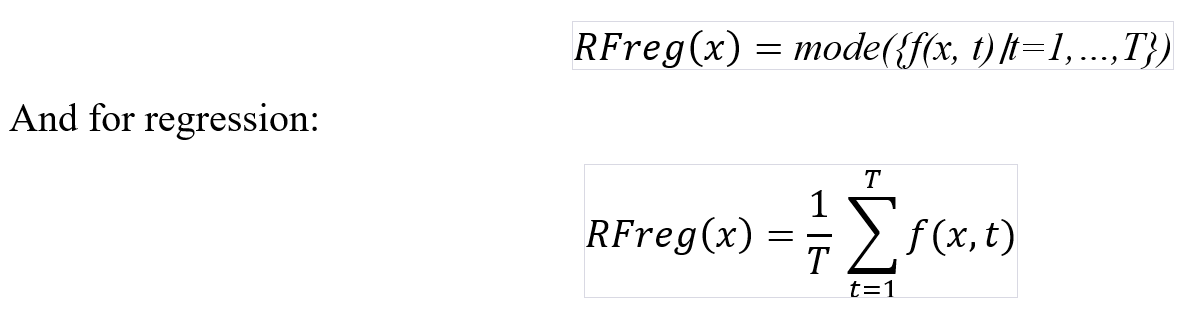

Where the mode is the value that appears most frequently in the set of predictions. This ensemble approach often results in a more robust and accurate model compared to individual decision trees, as it helps mitigate overfitting and captures a broader range of patterns in the data.


#### **How it works**
The random forest algorithm involves configuring three primary hyperparameters — **node size, the number of trees, and the number of features sampled** — prior to training. Subsequently, this random forest classifier can be applied to address regression or classification challenges.

Comprising a collection of decision trees, each tree within the ensemble is constructed from a data sample drawn with replacement from a training set, referred to as the bootstrap sample. One-third of this training sample is reserved as test data, known as the out-of-bag (oob) sample. Another layer of randomness is introduced through feature bagging, enhancing dataset diversity and diminishing correlation among decision trees. The determination of predictions varies based on the task type; for regression, individual decision trees are averaged, while for classification, a majority vote—reflecting the most frequent categorical variable—determines the predicted class. Subsequently, the oob sample is utilized for cross-validation, finalizing the prediction.

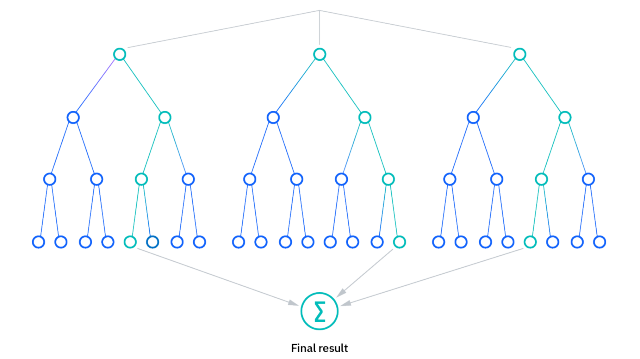

Image retrieved by [IBM web page](https://www.ibm.com/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly,both%20classification%20and%20regression%20problems)

Consider a simple example of a Random Forest for a binary classification task with three decision trees. Suppose we have the following dataset:

| Feature 1 | Feature 2 | Target |
|-----------|-----------|--------|
| 2         | 3         | 0      |
| 3         | 5         | 1      |
| 5         | 1         | 0      |
| 6         | 4         | 1      |
| 4         | 2         | 0      |
| 7         | 3         | 1      |

Proceed with building a Random Forest consisting of three decision trees. Here, each tree will be trained on a random subset of the given data. During each split, a random subset of features will be considered. After the training process, suppose the individual tree predictions for a new data point (X_new) are as follows:

- Tree 1 predicts class 1
- Tree 2 predicts class 0
- Tree 3 predicts class 1

For a classification task, the Random Forest combines predictions through a majority vote. In this case, **two out of three trees predict class 1**. Therefore, the Random Forest's final prediction for X_new is **class 1**.

#### **Random Forest Algorithm in Python**
In this example, the Random Forest Algorithm is applied to the well-known Iris dataset using Python's sci-kit-learn library. The dataset is divided into features (X) and target labels (y) and subsequently split into training and testing sets. A Random Forest Classifier with 100 trees is then created and trained on the training set. The model's performance is evaluated on the test set using metrics such as accuracy, confusion matrix, and classification report. Additionally, the feature importance of each variable is visualized through a horizontal bar chart. 

In [1]:
# Import libraries requiered
%pip install scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


RESULTS:

ACCURACY: 1.0

CONFUSION MATRIX:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

BAR CHART:



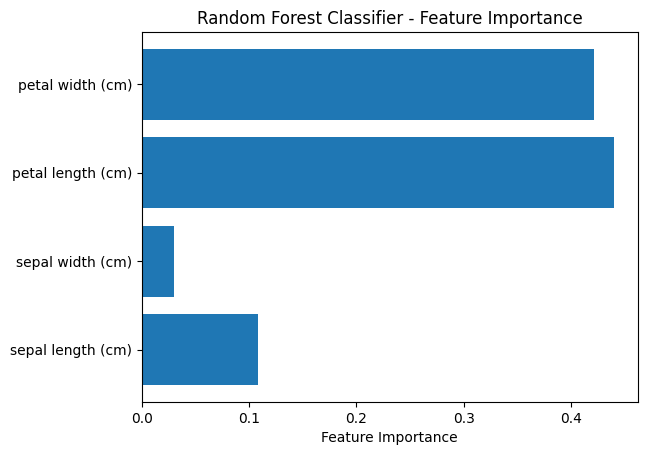

In [2]:
# Import libraries requiered
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("RESULTS:")
print()
print(f"ACCURACY: {accuracy}")
print("\nCONFUSION MATRIX:")
print(conf_matrix)
print("\nCLASSIFICATION REPORT:")
print(class_report)

# Visualize feature importance
print("BAR CHART:")
feature_importance = rf_classifier.feature_importances_
feature_names = iris.feature_names

print()
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()


- The results of the Random Forest Classifier applied to the Iris dataset demonstrate exceptional performance, as indicated by an accuracy score of 1.0, implying a perfect classification of the test set. 
- The confusion matrix further supports this with all diagonal elements being non-zero, indicating correct predictions for each class (setosa, versicolor, and virginica). 
- The classification report provides additional details on the precision, recall, and F1-score for each class, all of which are at the maximum value of 1.0, emphasizing the model's ability to correctly identify instances from each class. 
- The macro and weighted averages also highlight the overall excellent performance across all classes. 
- The accompanying feature importance graph further contributes to the interpretability of the model, showing the contribution of each feature to the classification task. In summary, the Random Forest Algorithm demonstrates outstanding accuracy and robustness in classifying the Iris dataset, making it a reliable choice for similar classification tasks.


#### **Example of Random Forest with synthetic data - Python Environment**

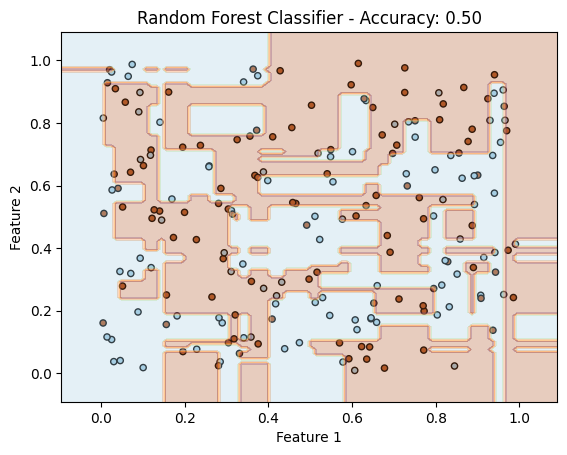

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic data
np.random.seed(42)
X, y = np.random.rand(200, 2), (np.random.rand(200) > 0.5).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier with 3 trees
rf_classifier = RandomForestClassifier(n_estimators=3, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', s=20)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)

plt.title(f"Random Forest Classifier - Accuracy: {accuracy:.2f}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


#### **Random Forest Algorithm, a practical example using a software tool (Orange)**
The following figure explores interpretability in classification trees using the Pythagorean Tree viewer for larger trees. The spotlight then shifts to random forests, where we introduce and compare their performance to single trees via cross-validation. Additionally, this example provides a concise and comprehensive exploration of interpretability within classification trees and the considerations involved in employing ensemble methods like random forests through the use of “Orange” software.

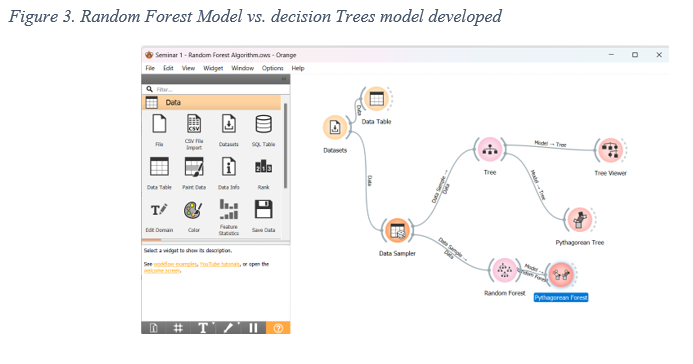

The Pythagorean Tree view of a Decision Tree model is an interactive visualization that represents the structure and decision-making process of the tree in a graphical format. It is designed to enhance the interpretability of Decision Trees, making it easier for users to understand how the model makes decisions at each node. In the Pythagorean Tree view, nodes of the Decision Tree are represented by geometric shapes (often triangles), and the size of each shape corresponds to the number of instances or samples at that particular node. The colour or shading of the nodes can indicate the class distribution or other relevant information. Typically, Random Forests are visualized by aggregating the information from multiple decision trees.

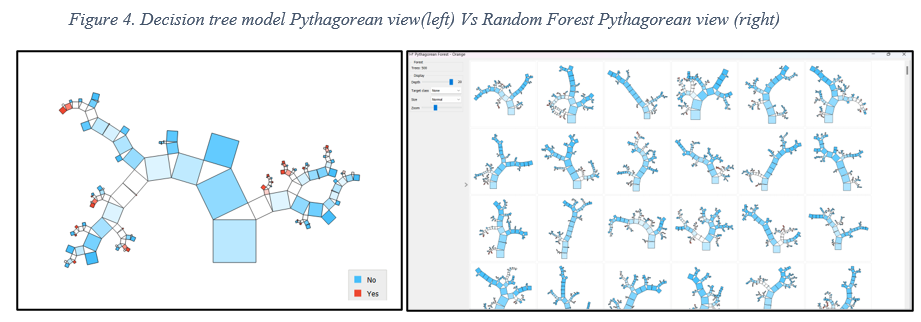

The following metrics serve different purposes: AUC assesses discrimination, CA measures overall correctness, and F1 Score balances precision and recall. The choice depends on the specific goals and characteristics of the classification problem.
•	AUC (Area Under the ROC Curve): Measures the discriminative ability of a model, ranging from 0 to 1. Higher values indicate better performance.
•	CA (Classification Accuracy): Calculates the ratio of correctly predicted instances to the total instances, providing a straightforward percentage of correct classifications.
•	F1 Score: Balances precision and recall, offering a single metric that considers both false positives and false negatives. Ranges from 0 to 1, with higher values indicating better model performance.

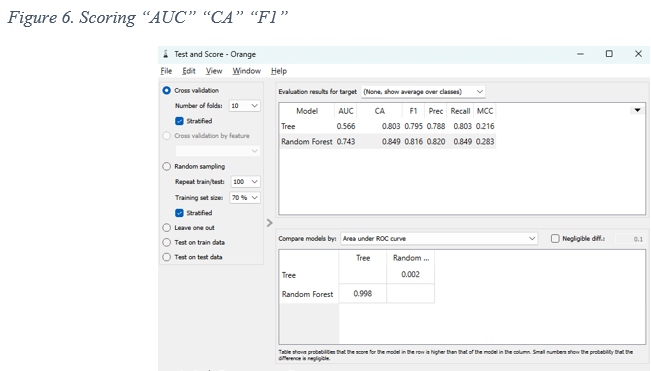

Increasing the sample size in a Random Forest model enhances its accuracy, especially in terms of Classification Accuracy (CA). This improvement arises from the ensemble nature of Random Forests, where diverse decision trees are trained on random data subsets, introducing variability and reducing overfitting. The added samples promote better generalization to new, unseen data, contributing to the ensemble's effectiveness in capturing underlying patterns. While this approach generally improves performance, it's crucial to consider potential diminishing returns and computational costs with larger datasets. Effectiveness may vary based on dataset characteristics and pattern complexity.

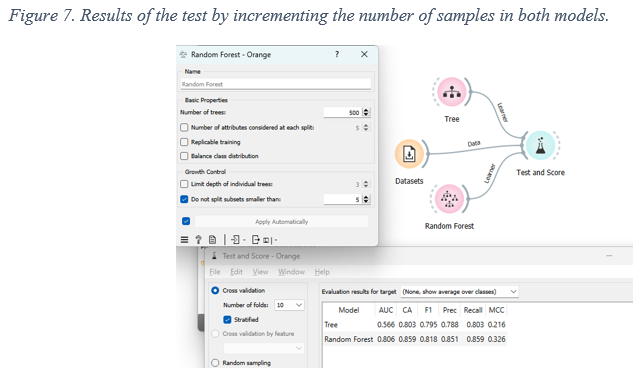

#### **When to use Random Forest Algorithm**
- Classification and Regression Tasks: Random Forests are versatile and can be applied to both classification and regression problems. They excel in scenarios where the relationship between features and the target variable is complex and non-linear.
- Large Feature Sets: Random Forests can handle datasets with a large number of features efficiently. They are capable of automatically selecting relevant features and providing insights into feature importance.
- Ensemble Learning: When the goal is to leverage the benefits of ensemble learning, Random Forests provides a robust solution. They combine the predictions of multiple decision trees to enhance overall model performance and reduce overfitting.

#### **Where NOT to use it**
- Interpretability is Critical: If interpretability is crucial and a highly interpretable model is required, Random Forests might not be the best choice. The complexity of the ensemble makes it challenging to interpret individual decision trees comprehensively.
- Real-Time Applications: In real-time applications requiring low-latency predictions, Random Forests might not be the most suitable choice. The ensemble nature and computational intensity can slow down real-time predictions.
- Linear Relationships: If the underlying relationship between features and the target variable is predominantly linear, simpler linear models may offer a more interpretable and efficient solution.


##### Random Forest in ORANGE Software [Link to YouTube Video](https://www.youtube.com/watch?v=gSQsFIMcA8A)

#### **Summary**
Classification trees are valuable for interpretability, but on employee attrition data, they become too large and intricate for practical understanding, revealing their instability with slight variations in samples. To address this, the concept of a random forest, or classification forest, is introduced. Instead of a single tree, a forest of trees is built through data sampling, providing diverse perspectives and voting on predicted classes, resulting in improved accuracy.

The text showcases the performance gain of random forests, highlighting an accuracy increase from 0.81 to 0.85 compared to individual trees. The impact of the number of trees in the forest is discussed, revealing a slight accuracy improvement with more trees. While excelling in accuracy, the challenge lies in interpretation, acknowledging the difficulty of understanding complex machine learning models despite their high predictive accuracy. Future videos are promised to explore additional classifiers and interpretation methods.


#### **REFERENCES**
ELKI. (n.d.). ELKI Data Mining Toolkit. Retrieved from https://elki-project.github.io/
James, G., Witten, D., Hastie, T., & Tibshirani, R. (2017). An Introduction to Statistical Learning: With Applications in R. Springer.
Keras. (n.d.). Keras: Deep Learning for humans. Retrieved from https://keras.io/
KNIME. (n.d.). KNIME | Open for Innovation. Retrieved from https://www.knime.com/
Outlier Detection Toolbox (ODTBX). (2020). Retrieved from https://www.sciencedirect.com/science/article/pii/S2352340920301316

PyOD. (n.d.). PyOD: A Python Toolbox for Scalable Outlier Detection. Retrieved from https://pyod.readthedocs.io/
PyTorch. (n.d.). PyTorch. Retrieved from https://pytorch.org/
RapidMiner. (n.d.). RapidMiner - Your Competitive Edge in Data Science. Retrieved from https://rapidminer.com/
Raschka, S. (n.d.). MLxtend: Extensions and Helper Tools for Python's Data Science Ecosystem. GitHub. Retrieved from https://github.com/rasbt/mlxtend
Scikit-learn. (n.d.). Machine Learning in Python — scikit-learn 0.24.2 documentation. Retrieved from https://scikit-learn.org/stable/
Scikit-learn. (n.d.). sklearn.ensemble.IsolationForest — scikit-learn 0.24.2 documentation. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
Statsmodels. (n.d.). Statsmodels. Retrieved from https://www.statsmodels.org/
TensorFlow. (n.d.). TensorFlow. Retrieved from https://www.tensorflow.org/
Zupan, B. (Writer). (2023, August 21). Random Forests [Video]. Presented by N. Novšak. Produced and edited by L. Zupan. Biolab. Retrieved from https://www.youtube.com/watch?v=gSQsFIMcA8A
